The details of the dataset



In [172]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from numpy import math

%matplotlib inline

In [173]:
import os 

path = os.getcwd()
data = pd.read_excel(path+'/data/Online_Retail.xlsx')

In [174]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [175]:
data.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [177]:
#remove NAs
data.dropna(inplace = True)

In [178]:
print(data.shape)
data.info()

(406829, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


Remove cancelled invoices

In [179]:
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data = data[~data['InvoiceNo'].str.contains('C')]

In [180]:
data.shape

(397924, 8)

In [181]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

EDA

In [182]:
df_desc = data['Description'].value_counts().reset_index()
df_desc.rename(columns = {'index': "Description_name", 'Description':'Count'}, inplace = True)
df_desc.head()

,Description_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


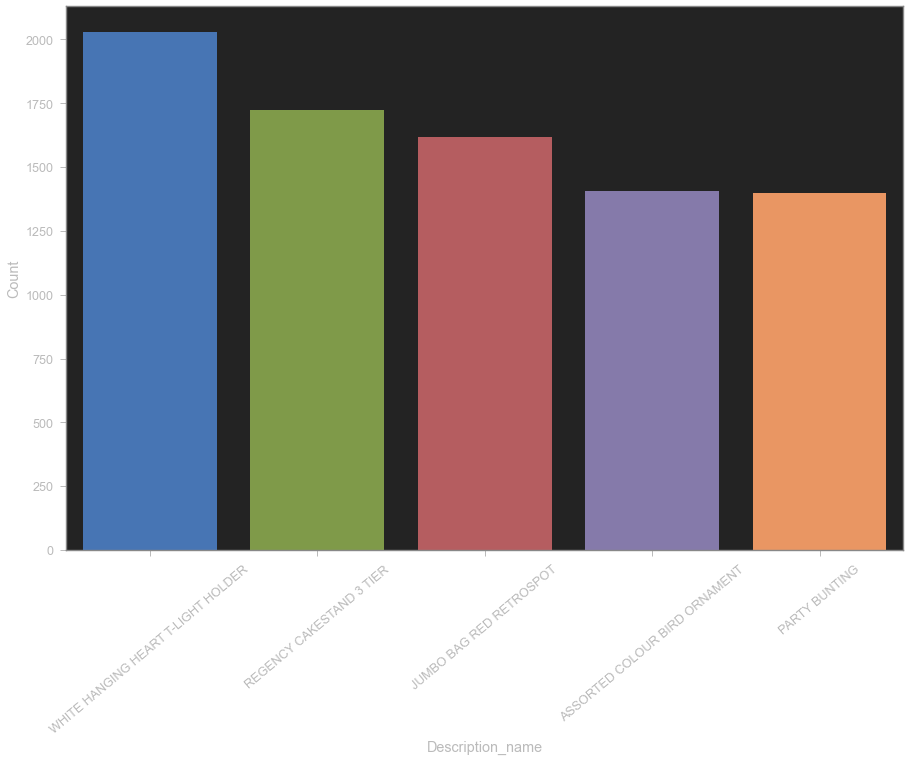

In [183]:
#top selling products
plt.figure(figsize=(15,10))
ax = sns.barplot(x = 'Description_name', y = 'Count', data = df_desc[:5])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
plt.show()

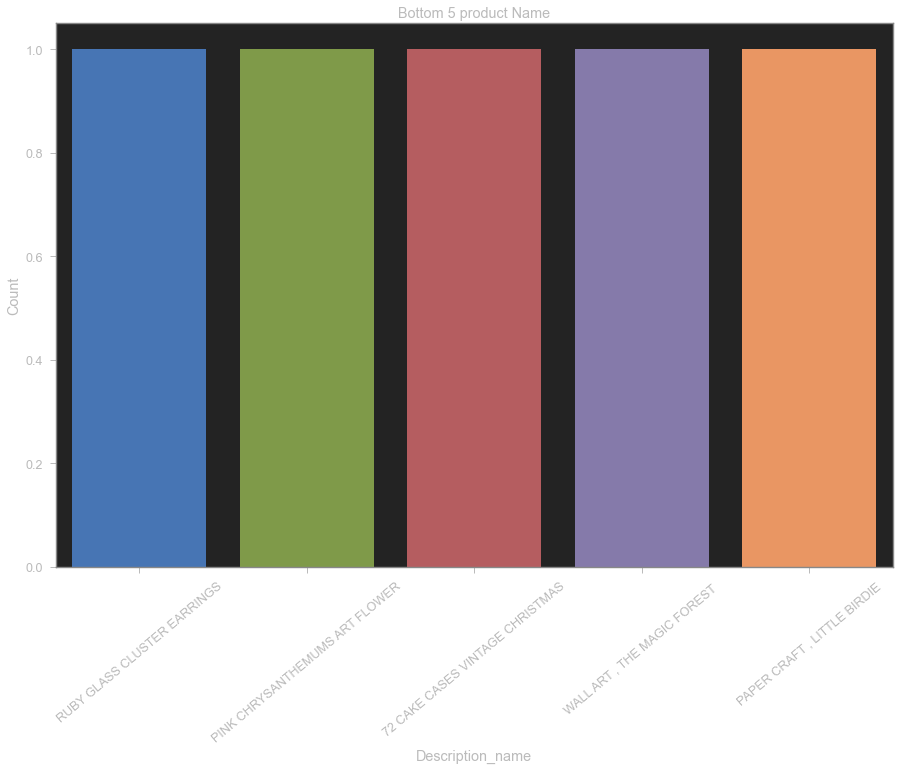

In [184]:
#least selling products
plt.figure(figsize=(15,10))
plt.title('Bottom 5 product Name')
ax = sns.barplot(x= 'Description_name',y= 'Count',data=df_desc[-5:])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
plt.show()

In [185]:
#Country based analysis

In [186]:
country_df=data['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
country_df.head()

,Country_Name,Count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


<AxesSubplot:title={'center':'top 5 country based on sale'}, xlabel='Country_Name', ylabel='Count'>

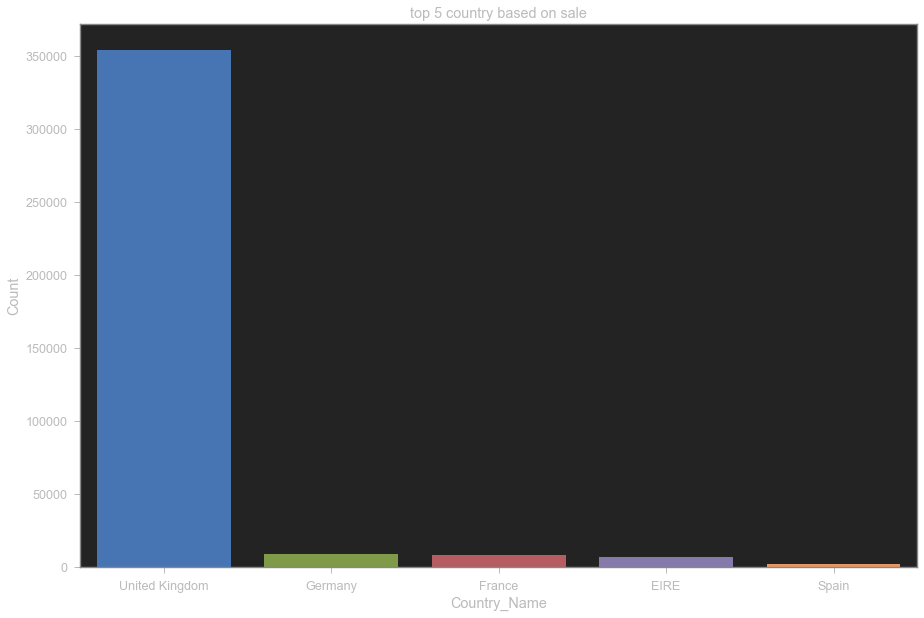

In [187]:
plt.figure(figsize=(15,10))
plt.title('top 5 country based on sale')
sns.barplot(x ='Country_Name', y = 'Count', data = country_df[:5])

In [188]:
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


<AxesSubplot:title={'center':'top 5 country based on sale'}, xlabel='Country_Name', ylabel='Count'>

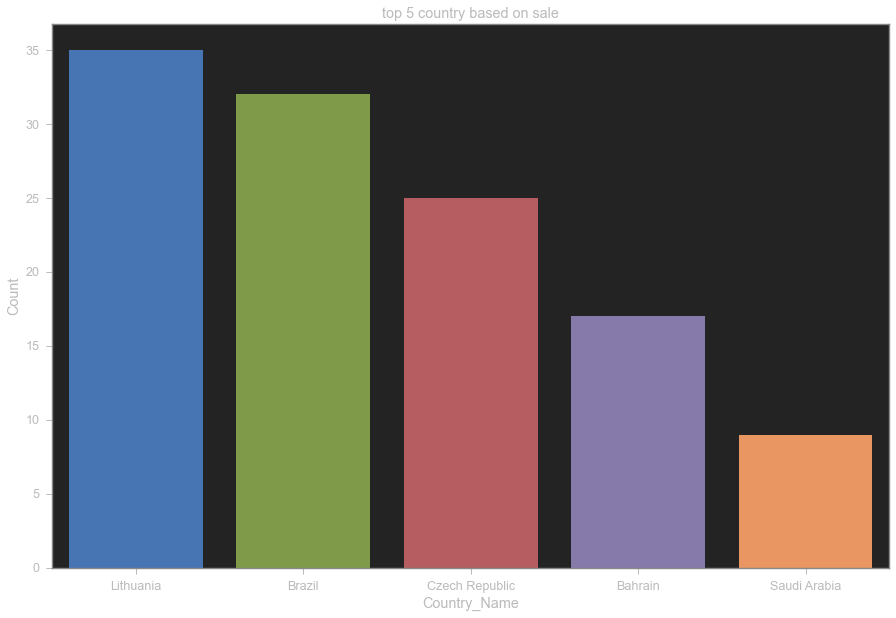

In [189]:
plt.figure(figsize=(15,10))
plt.title('top 5 country based on sale')
sns.barplot(x ='Country_Name', y = 'Count', data = country_df[-5:])

c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


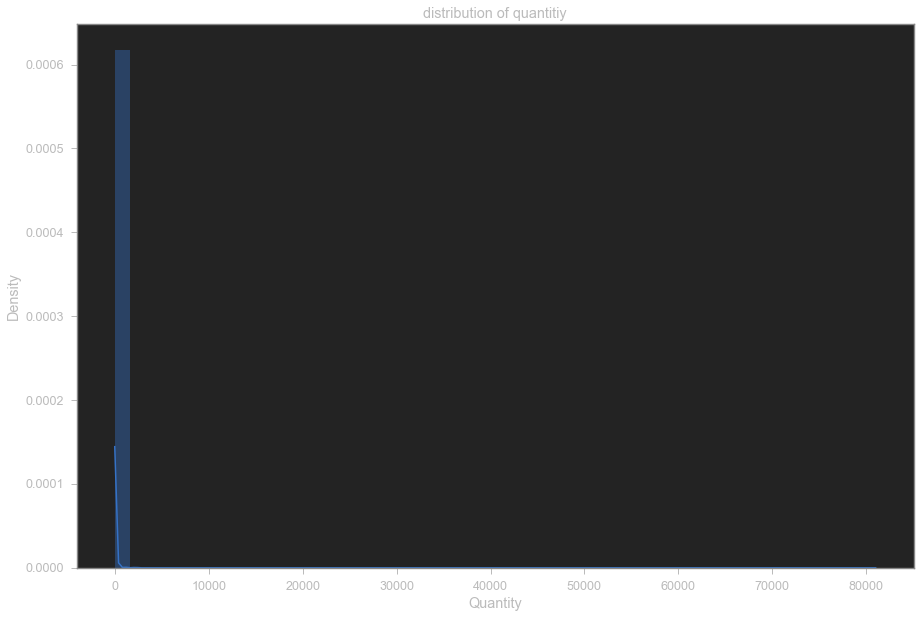

In [190]:
#check the skewness of distribution
plt.figure(figsize=(15,10))
plt.title('distribution of quantitiy')
sns.distplot(data['Quantity'])
plt.show()

c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


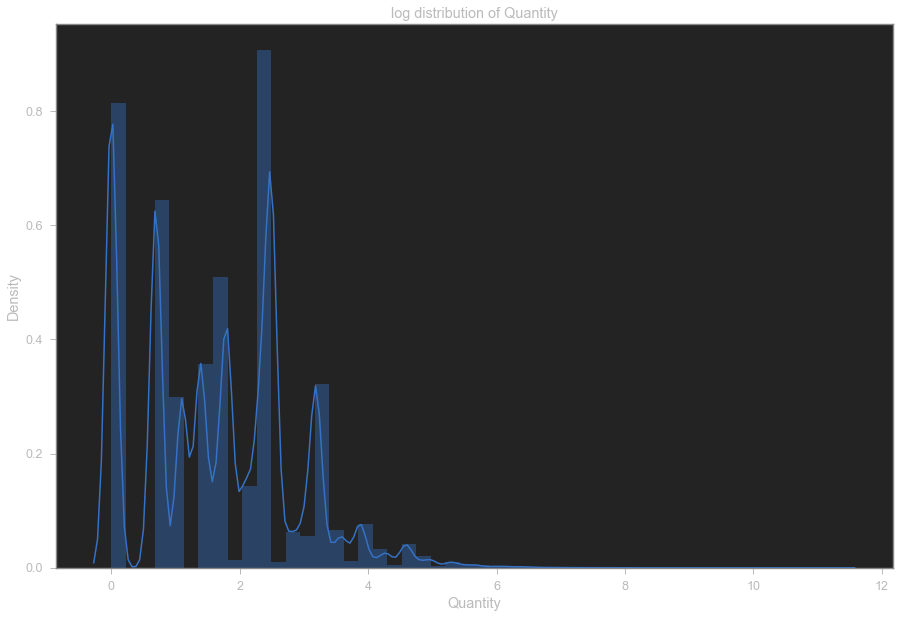

In [191]:
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(data['Quantity']))
plt.show()

In [192]:
data = data[data['UnitPrice']>0]

In [193]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Feature Engineering

In [194]:
#converting date into datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format="%Y-%M-%D %H:%M:%S")

In [195]:
data['day'] = data['InvoiceDate'].dt.day_name()

In [196]:
data.day.value_counts()

Thursday     80035
Wednesday    68885
Tuesday      66473
Monday       64893
Sunday       62773
Friday       54825
Name: day, dtype: int64

In [197]:
data['month'] = data['InvoiceDate'].dt.month_name()

In [198]:
#Create a new features Day from Invoicedate

data["year"] = data["InvoiceDate"].apply(lambda x: x.year)
data["month_num"] = data["InvoiceDate"].apply(lambda x: x.month)
data["day_num"] = data["InvoiceDate"].apply(lambda x: x.day)
data["hour"] = data["InvoiceDate"].apply(lambda x: x.hour)
data["minute"] = data["InvoiceDate"].apply(lambda x: x.minute)

In [199]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month,year,month_num,day_num,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26


In [200]:
data['totalamount'] = data['UnitPrice']*data['Quantity']


c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


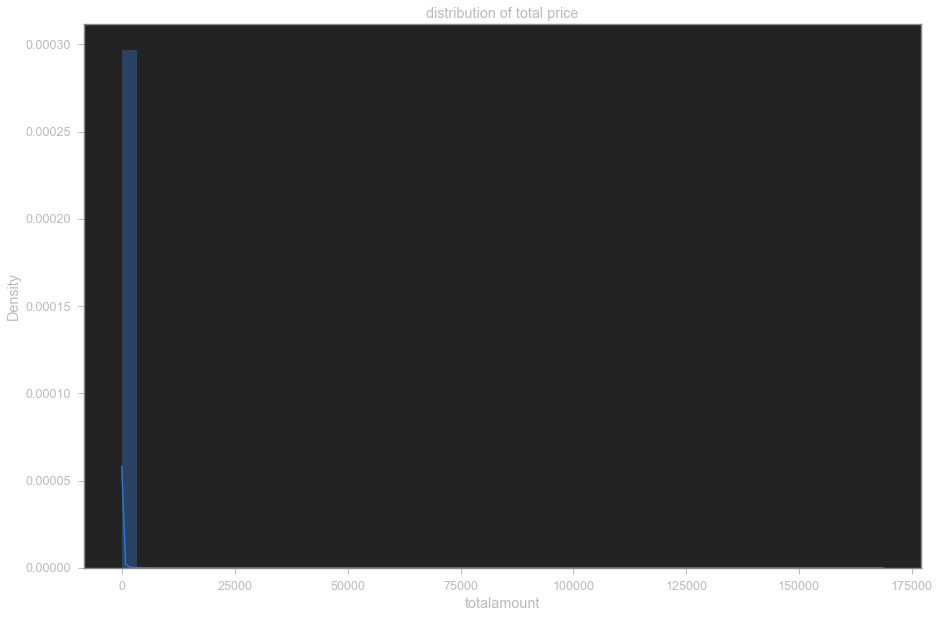

In [201]:
plt.figure(figsize=(15,10))
plt.title('distribution of total price')
sns.distplot(data['totalamount'])
plt.show()

c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


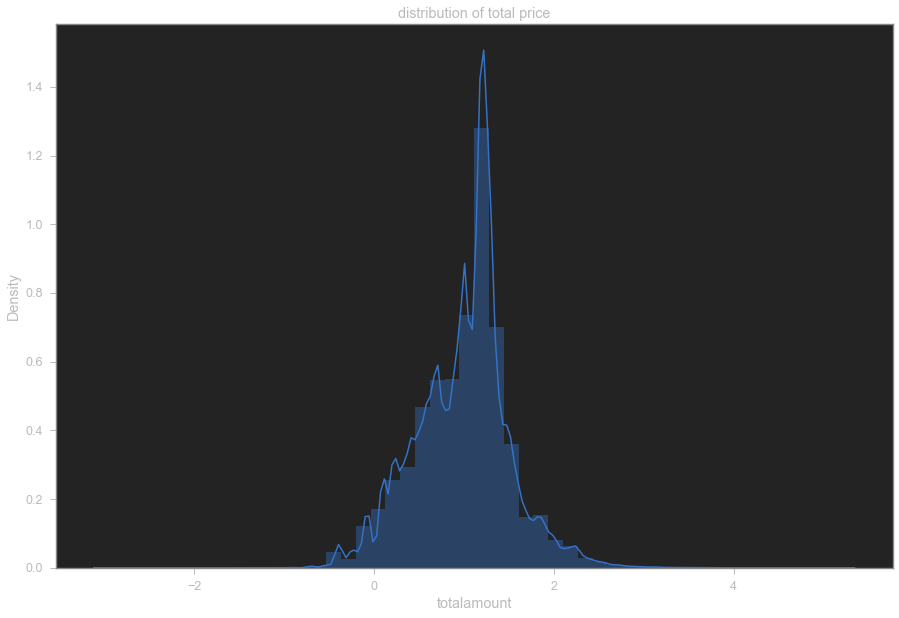

In [202]:
plt.figure(figsize=(15,10))
plt.title('distribution of total price')
sns.distplot(np.log10(data['totalamount']))
plt.show()

<AxesSubplot:>

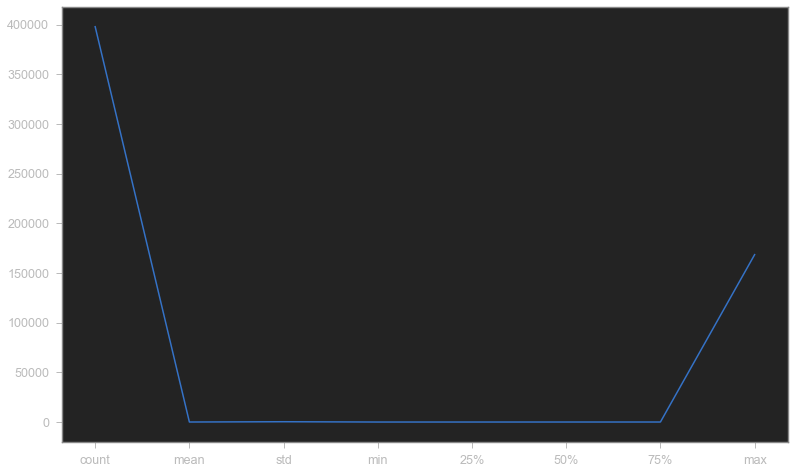

In [203]:
plt.figure(figsize=(13,8))
data['totalamount'].describe().plot()

Day base analysis

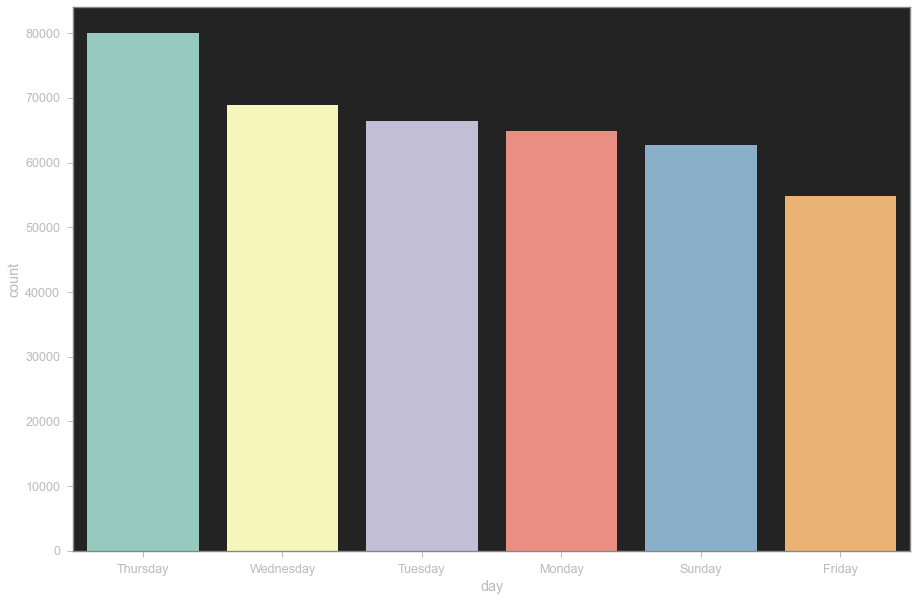

In [204]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'day', data = data, order= data['day'].value_counts().index, palette="Set3")
plt.show()

Month base analysis

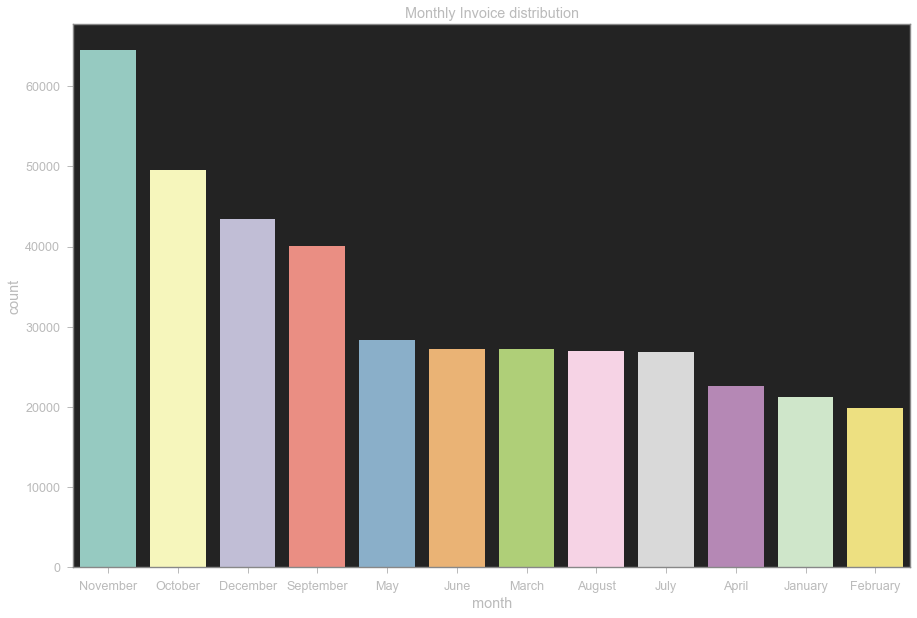

In [205]:
plt.figure(figsize=(15,10))
plt.title('Monthly Invoice distribution')
sns.countplot(x = 'month', data = data, order= data['month'].value_counts().index, palette="Set3")
plt.show()

Hourly Analysis

<AxesSubplot:title={'center':'Hourly invoice'}, xlabel='hour', ylabel='count'>

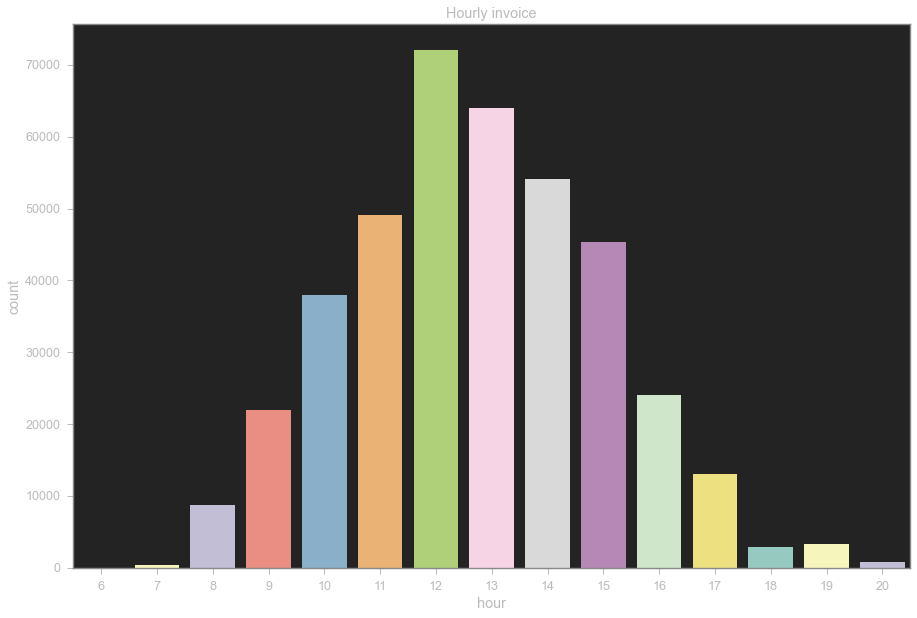

In [206]:
plt.figure(figsize=(15,10))
plt.title('Hourly invoice')
sns.countplot(x = 'hour',data = data, palette='Set3')


##### most purchases were made during the afernoon

In [207]:
#converting time into 3 shifts

def time_type(time):
  if(time == 5 or time==6 or time==7 or time==8 or time==9 or time==10):
    return 'morning'
  elif(time==11 or time == 12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'afternoon'
  else:
    return 'evening'

In [208]:
data['time_slot'] = data['hour'].apply(time_type)

afternoon    321822
morning       69011
evening        7051
Name: time_slot, dtype: int64


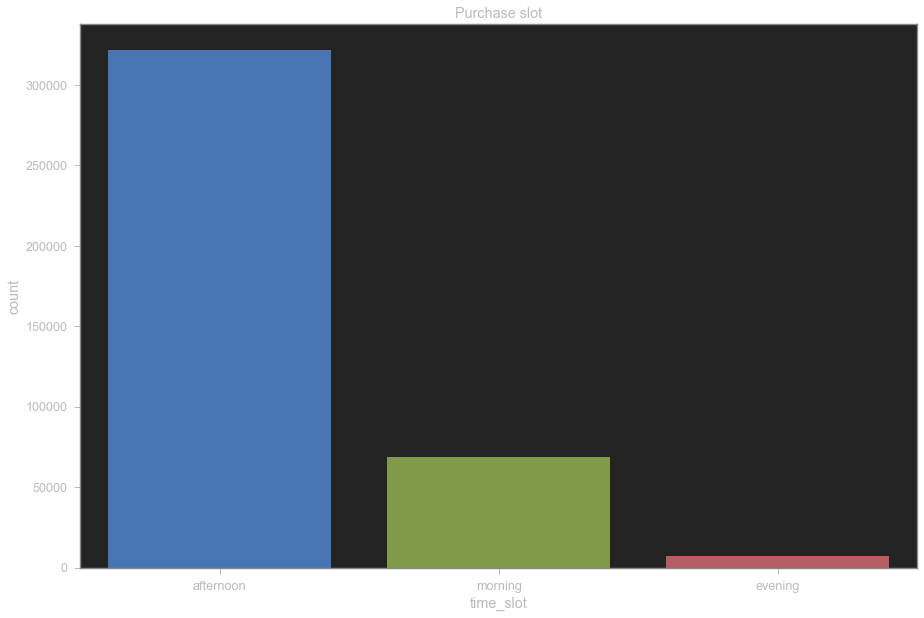

In [209]:
print(data['time_slot'].value_counts())
plt.figure(figsize=(15,10))
plt.title('Purchase slot')
sns.countplot(x = 'time_slot', data = data, order = data['time_slot'].value_counts().index)
plt.show()

##### most purchases were made between 11am to 5 pm 

In [210]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month,year,month_num,day_num,hour,minute,totalamount,time_slot
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,15.30,morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34,morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,22.00,morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34,morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34,morning


Creating Recency , Frequency, monetary Model

In [211]:
import datetime as dt

lt_date = dt.datetime(2011,12,10)

rfm_df = data.groupby('CustomerID').agg(
    {'InvoiceDate': lambda x:(lt_date  - x.max()).days,
     'InvoiceNo': lambda x: len(x),
     'totalamount': lambda x:x.sum()}
)

rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'totalamount': 'Monetary'}, inplace=True)

rfm_df.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64


c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


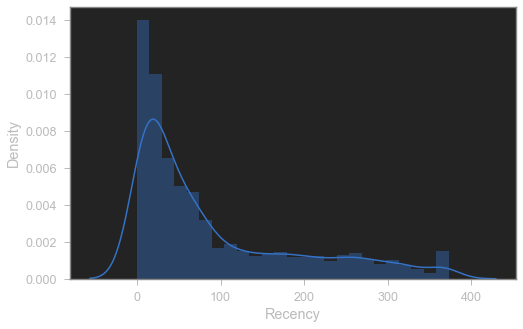

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64


c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


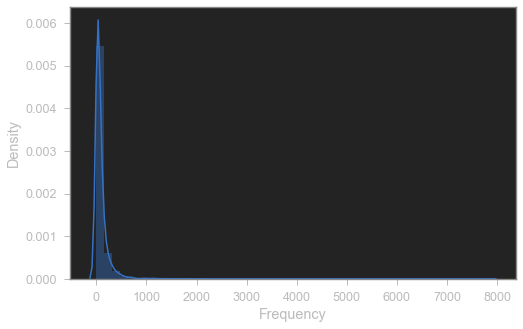

c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetary, dtype: float64


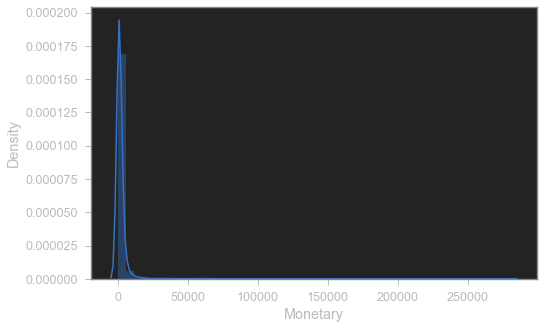

In [212]:
#Descriptive Statiscs
for col in ['Recency', 'Frequency', 'Monetary']:
    print(rfm_df[col].describe())
    plt.figure(figsize=(8,5))
    sns.distplot(rfm_df[col])
    plt.show()


In [213]:
#handling 0 and negatives
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

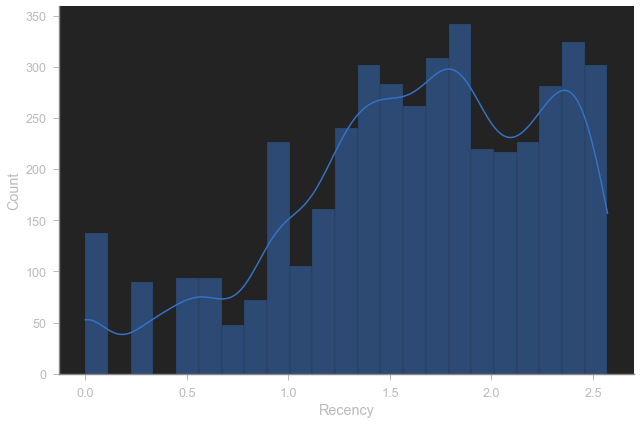

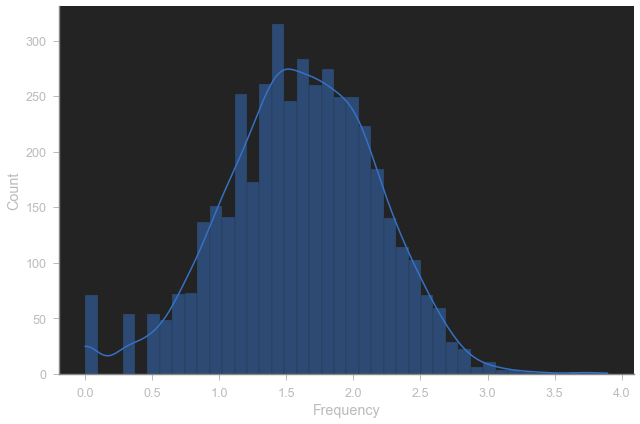

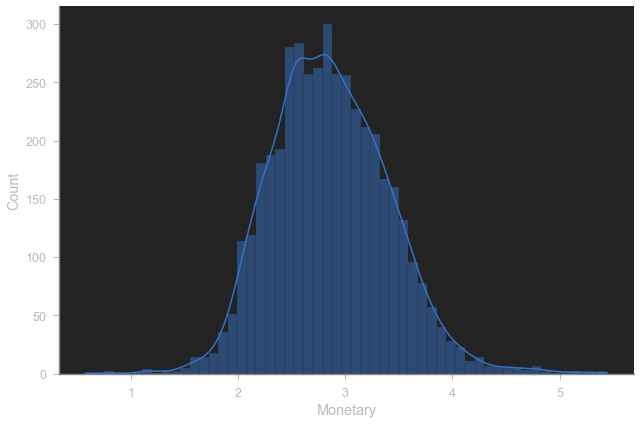

In [214]:
#applying log transformation
for col in ['Recency', 'Frequency', 'Monetary']:
    sns.displot(np.log10(rfm_df[col]), kde = True, height=6, aspect=1.5)


splitting into quartiles

In [215]:
quantiles = rfm_df.quantile(q=[.25,.5,.75])
quantiles = quantiles.to_dict()

In [216]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002}}

In [217]:
#RFM segements

# recency the less(more recent) score the better
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# frequency and monetory the more the better
def FnMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4


In [218]:
rfm_df['R'] = rfm_df['Recency'].apply(RScore, args = ('Recency',quantiles))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScore, args = ('Frequency',quantiles))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScore, args = ('Monetary',quantiles))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,18,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


In [219]:
#appending the score
rfm_df['RFMgroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#adding the values
rfm_df['RFMScore'] = rfm_df[['R','F','M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6
12347.0,2,182,4310.00,4,4,4,444,12
12348.0,75,31,1797.24,2,2,4,224,8
12349.0,18,73,1757.55,3,3,4,334,10
12350.0,310,17,334.40,1,1,2,112,4


In [220]:
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

Data Preprocessing and Visualization

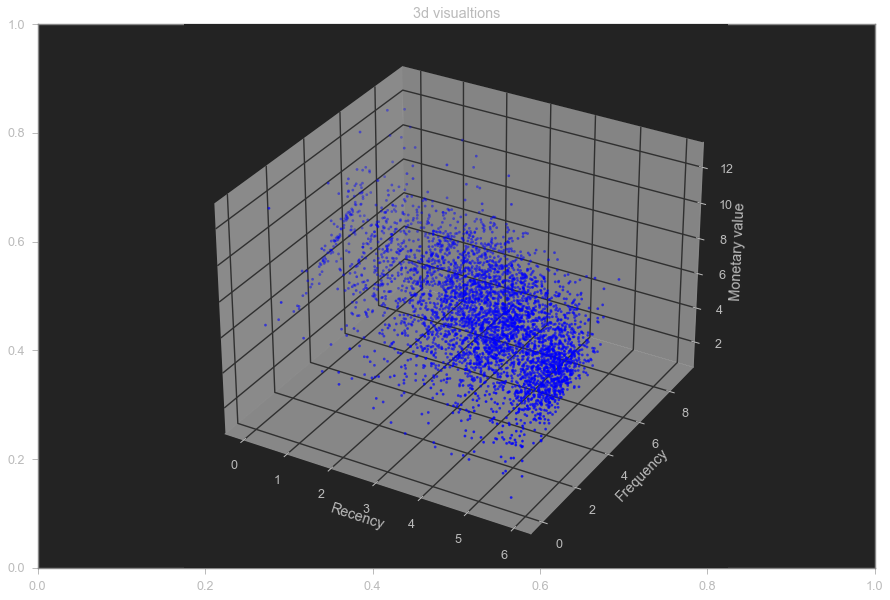

In [221]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
plt.title('3d visualtions')
ax =fig.add_subplot(111,projection = '3d')
xs = rfm_df.Recency_log
ys = rfm_df.Frequency_log
zs = rfm_df.Monetary_log
ax.scatter(xs,ys,zs,s=6, c='blue')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()


In [222]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()

In [223]:
features = ['Recency_log', 'Frequency_log', 'Monetary_log']
X_features = rfm_df[features].values
X = stdscaler.fit_transform(X_features)

Applying K-Means with Elbow curve and Silhoutte score

For n_clusters = 2 The average silhouette_score is : 0.395423791756615
For n_clusters = 3 The average silhouette_score is : 0.3031065868149085
For n_clusters = 4 The average silhouette_score is : 0.30265802333674247
For n_clusters = 5 The average silhouette_score is : 0.2785519277480847
For n_clusters = 6 The average silhouette_score is : 0.2789560652501828
For n_clusters = 7 The average silhouette_score is : 0.26705312329071623
For n_clusters = 8 The average silhouette_score is : 0.2628842984354778
For n_clusters = 9 The average silhouette_score is : 0.2526112489121639
For n_clusters = 10 The average silhouette_score is : 0.26385997542930634
For n_clusters = 11 The average silhouette_score is : 0.2601352512266842
For n_clusters = 12 The average silhouette_score is : 0.26628807361893403
For n_clusters = 13 The average silhouette_score is : 0.26330240128362115
For n_clusters = 14 The average silhouette_score is : 0.2610018786351476
For n_clusters = 15 The average silhouette_score is : 0

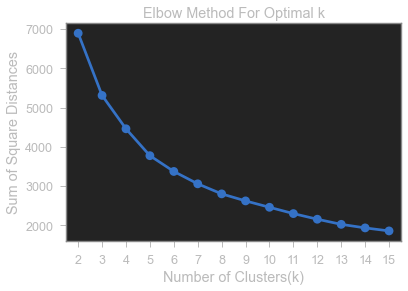

In [224]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

n_clusters = list(range(2,16,1))
ssd = {}
for cluster in n_clusters:
    clusters = KMeans(n_clusters=cluster, random_state=11)
    clusterer = clusters.fit(X)
    cluster_label = clusters.predict(X)
    cluster_center = clusters.cluster_centers_

    ssd[cluster] = clusterer.inertia_

    sil_score = silhouette_score(X, cluster_label)

    print("For n_clusters =", cluster,
        "The average silhouette_score is :", sil_score)

sns.pointplot(x = list(ssd.keys()), y = list(ssd.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


Visualizing cluster for different number of clustering

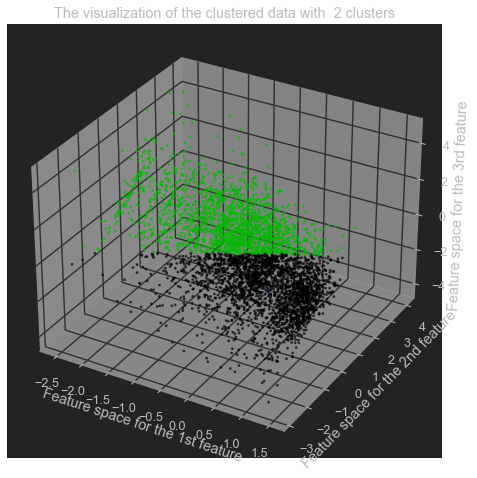

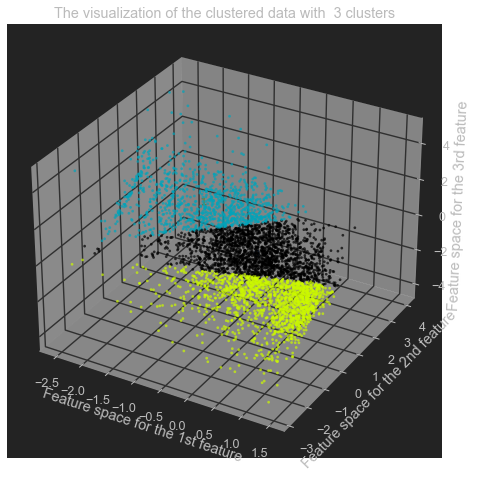

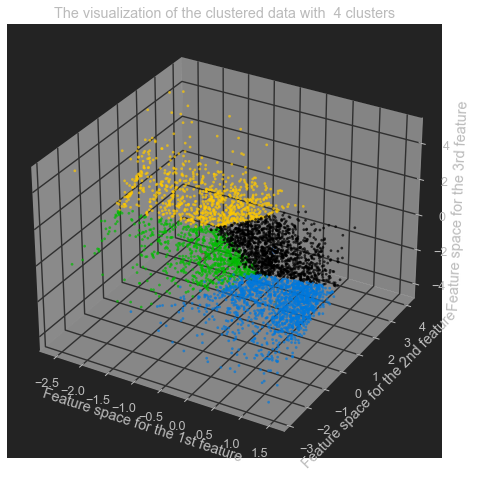

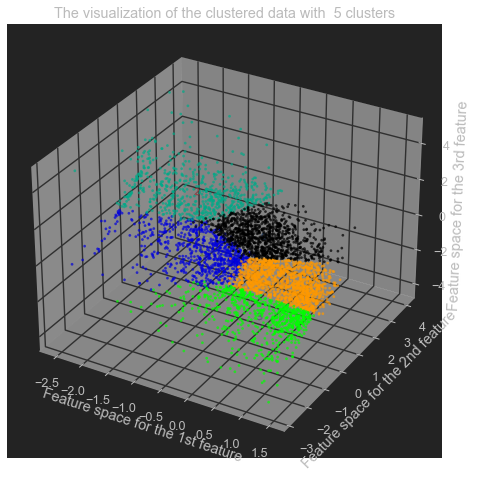

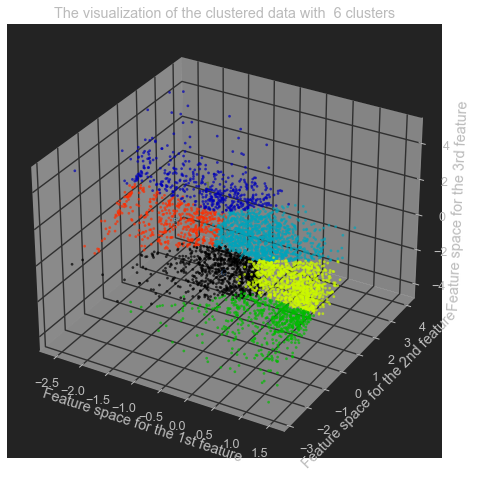

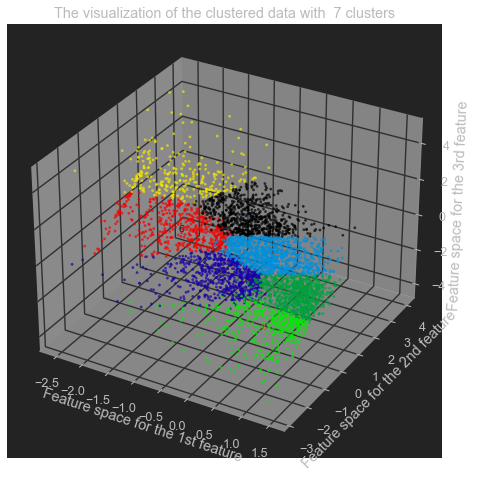

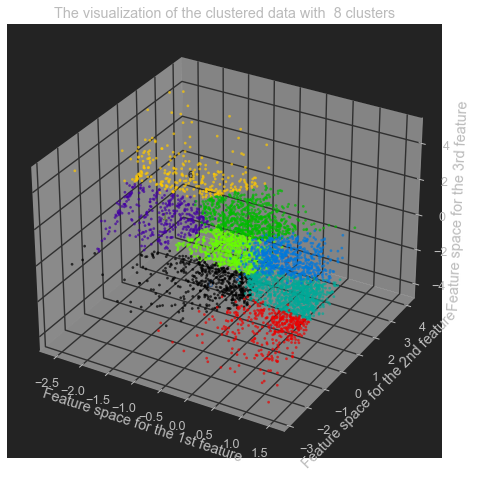

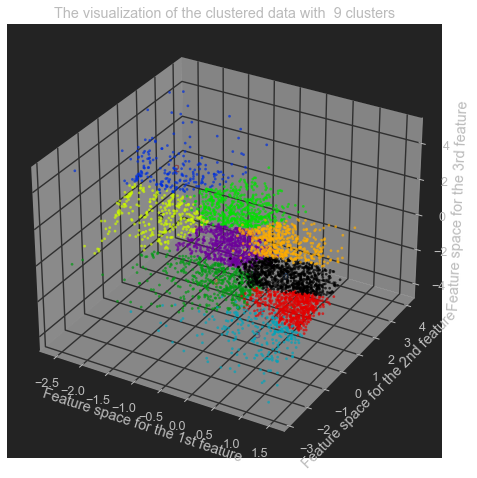

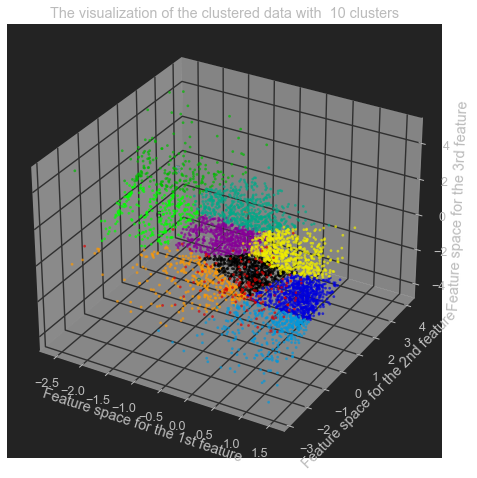

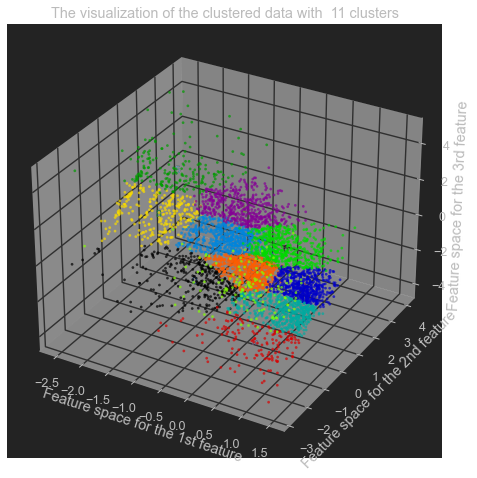

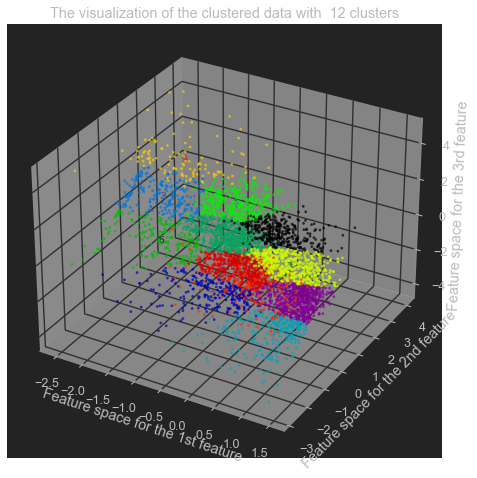

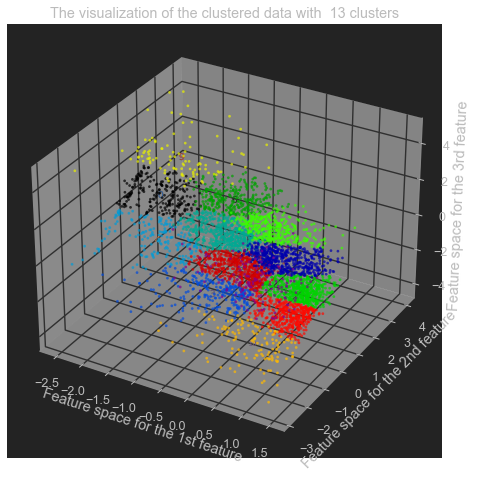

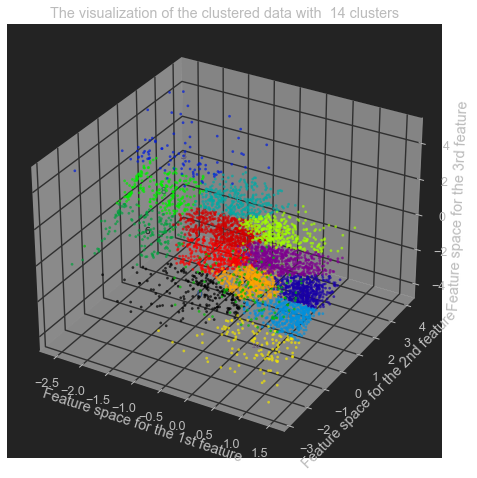

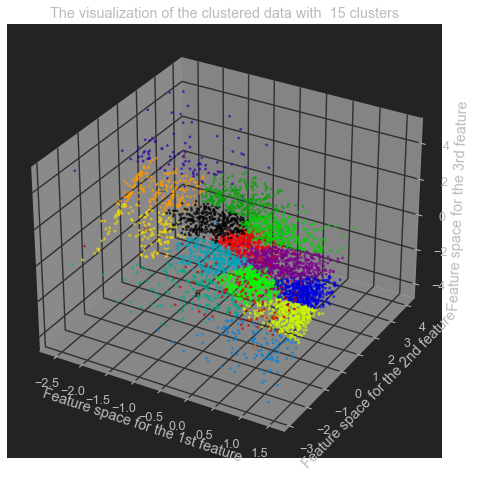

In [255]:
import matplotlib.cm as cm
from mpl_toolkits import mplot3d

for cluster in n_clusters:

    clusters = KMeans(n_clusters=cluster, random_state=11)
    cluster_labels = clusters.fit_predict(X)

    plt.figure(figsize=(10,8))
    ax = plt.axes(projection = '3d')

    colors = cm.nipy_spectral(cluster_labels.astype(float) /cluster)
    ax.scatter(X[:, 0], X[:, 1], X[:,2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusters.cluster_centers_

    for i, c in enumerate(centers):
        ax.scatter(c[0], c[1],c[2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax.set_title("The visualization of the clustered data with  %d clusters" % cluster)
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")
    ax.set_zlabel("Feature space for the 3rd feature")
    
plt.show()




In [235]:
#Perform K-Mean Clustering for 2 cluster K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMScore,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6,5.783825,0.000000,11.253942,1
12347.0,2,182,4310.00,4,4,4,444,12,0.693147,5.204007,8.368693,0
12348.0,75,31,1797.24,2,2,4,224,8,4.317488,3.433987,7.494007,1
12349.0,18,73,1757.55,3,3,4,334,10,2.890372,4.290459,7.471676,0
12350.0,310,17,334.40,1,1,2,112,4,5.736572,2.833213,5.812338,1
12352.0,36,85,2506.04,3,3,4,334,10,3.583519,4.442651,7.826459,0
12353.0,204,4,89.00,1,1,1,111,3,5.318120,1.386294,4.488636,1
12354.0,232,58,1079.40,1,3,3,133,7,5.446737,4.060443,6.984161,1
12355.0,214,13,459.40,1,1,2,112,4,5.365976,2.564949,6.129921,1


Dendogram for optimal cluster

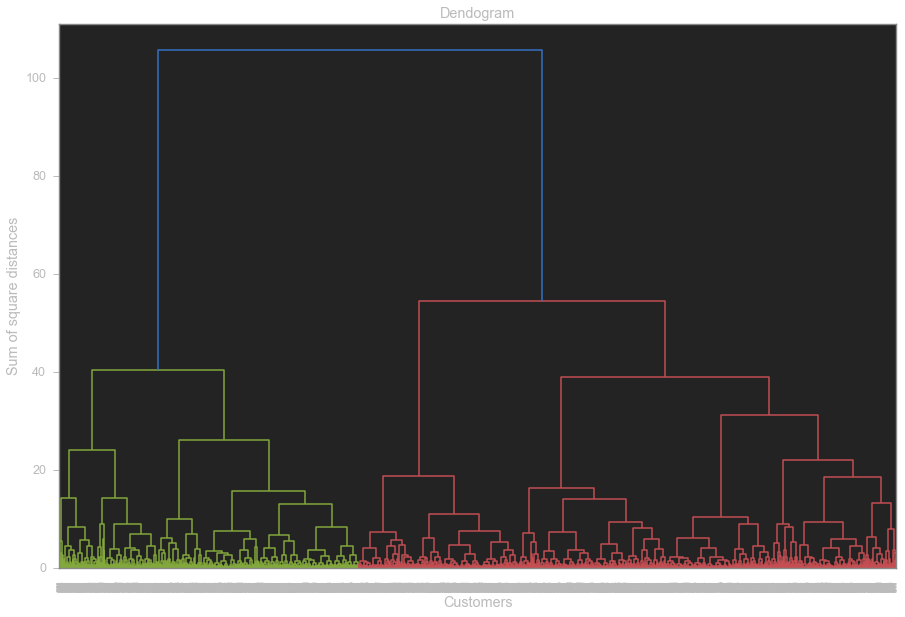

In [236]:
import scipy.cluster.hierarchy as sch 
plt.figure(figsize=(15,10))
dendogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Sum of square distances')
plt.show()

 As seen from the dendogram, Optimal number of cluster observed to be 3


In [237]:
#agglomerative clustering

from sklearn.cluster import AgglomerativeClustering as ag_c
hc = ag_c(n_clusters =  3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

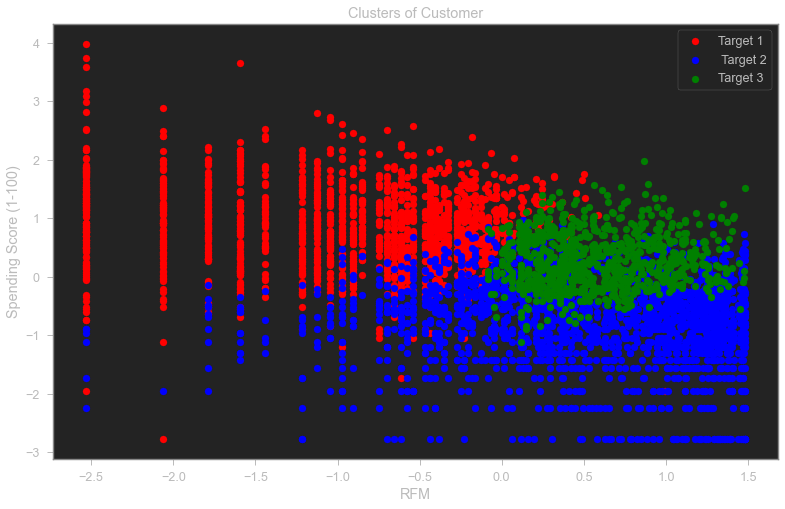

In [238]:
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Target 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = ' Target 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target 3')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'orange', label = 'Target 4')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'black', label = 'Target 5')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Applying DBSCAN for clustering

In [240]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
db_scan = DBSCAN(eps=0.5, min_samples= 20)
y_pred = db_scan.fit_predict(X)

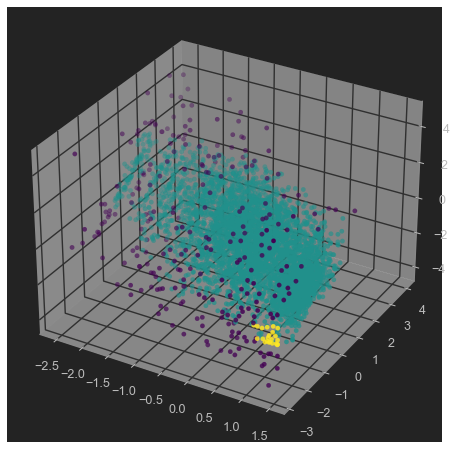

In [253]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(13,8))
ax = plt.axes(projection ="3d")

ax.scatter3D(X[:,0], X[:,1], X[:,2], c = y_pred)
plt.show()

### Summary

In [242]:
from prettytable import PrettyTable 



myTable = PrettyTable()

myTable = PrettyTable(['S.No.', 'Model_name', 'Data', 'Optimal no. of Clusters'])

#add rows
myTable.add_row(['1',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RFM", "5"])
myTable.add_row(['3',"Hierarchical clustering(Agglomerative)  ", "RFM", "3"])
myTable.add_row(['4',"DBSCAN ", "RFM", "3"])
print(myTable)

+-------+------------------------------------------+------+-------------------------+
| S.No. |                Model_name                | Data | Optimal no. of Clusters |
+-------+------------------------------------------+------+-------------------------+
|   1   |      K-Means with silhouette_score       | RFM  |            2            |
|   2   |       K-Means with Elbow methos          | RFM  |            5            |
|   3   | Hierarchical clustering(Agglomerative)   | RFM  |            3            |
|   4   |                 DBSCAN                   | RFM  |            3            |
+-------+------------------------------------------+------+-------------------------+
